In [4]:
import pandas as pd
import numpy as np

#чтение данных из файлов
air_reserve = pd.read_csv("air_reserve.csv")
hpg_reserve = pd.read_csv("hpg_reserve.csv")
air_store_info = pd.read_csv("air_store_info.csv")
hpg_store_info = pd.read_csv("hpg_store_info.csv")
store_id_relation = pd.read_csv("store_id_relation.csv")
air_visit_data = pd.read_csv("air_visit_data.csv")
date_info = pd.read_csv("date_info.csv")
sample_submission = pd.read_csv('sample_submission.csv')


data_dict = {
    "air_reserve": air_reserve,
    "hpg_reserve": hpg_reserve,
    "air_store_info": air_store_info,
    "hpg_store_info": hpg_store_info,
    "store_id_relation": store_id_relation,
    "air_visit_data": air_visit_data,
    "date_info": date_info,
    "sample_submission": sample_submission,
}

for name, df in data_dict.items():
    print(f'Таблица {name.upper()}')
    print(df.head(20))

Таблица AIR_RESERVE
            air_store_id       visit_datetime     reserve_datetime  \
0   air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   
1   air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
2   air_db4b38ebe7a7ceff  2016-01-01 19:00:00  2016-01-01 19:00:00   
3   air_877f79706adbfb06  2016-01-01 20:00:00  2016-01-01 16:00:00   
4   air_db80363d35f10926  2016-01-01 20:00:00  2016-01-01 01:00:00   
5   air_db80363d35f10926  2016-01-02 01:00:00  2016-01-01 16:00:00   
6   air_db80363d35f10926  2016-01-02 01:00:00  2016-01-01 15:00:00   
7   air_3bb99a1fe0583897  2016-01-02 16:00:00  2016-01-02 14:00:00   
8   air_3bb99a1fe0583897  2016-01-02 16:00:00  2016-01-01 20:00:00   
9   air_2b8b29ddfd35018e  2016-01-02 17:00:00  2016-01-02 17:00:00   
10  air_6b15edd1b4fbb96a  2016-01-02 17:00:00  2016-01-01 22:00:00   
11  air_6b15edd1b4fbb96a  2016-01-02 17:00:00  2016-01-01 12:00:00   
12  air_6b15edd1b4fbb96a  2016-01-02 17:00:00  2016-01-02 16:00:00   


In [5]:
#строки в дату
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])
date_info['calendar_date'] = pd.to_datetime(date_info['calendar_date'])

#тут объединяются даты чтобы в эир визит дейт добавить из дэйт инфо про праздники и вообще про все
air_visit_data = air_visit_data.merge(date_info, left_on='visit_date', right_on='calendar_date', how='left')
air_visit_data = air_visit_data.drop(columns=['calendar_date']) # уже есть visit_date

air_visit_data['month'] = air_visit_data['visit_date'].dt.month

air_visit_data = air_visit_data.merge(air_store_info[['air_store_id', 'air_genre_name', 'air_area_name']], on='air_store_id', how='left')





# air_reserve


air_reserve = air_reserve.drop(columns=['reserve_datetime'])
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime']).dt.date

# посетители по брони для каждой даты каждого ресторана
air_reserve = air_reserve.groupby(['air_store_id', 'visit_datetime'], as_index=False, sort=False)['reserve_visitors'].sum()

air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])





air_visit_data = air_visit_data.merge(air_reserve[['air_store_id', 'visit_datetime', 'reserve_visitors']], left_on=['air_store_id', 'visit_date'], right_on=['air_store_id', 'visit_datetime'], how='left')
air_visit_data = air_visit_data.drop(columns=['visit_datetime'])

# В некоторой части ресторанов отсутствует информация количества визиторс по брони
air_visit_data['reserve_visitors'] = air_visit_data['reserve_visitors'].fillna(0)

air_visit_data = air_visit_data.merge(store_id_relation[['air_store_id', 'hpg_store_id']], on='air_store_id', how='left')
air_visit_data['hpg_store_id'] = air_visit_data['hpg_store_id'].fillna('unknown')


air_visit_data.info()
air_visit_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   air_store_id      252108 non-null  object        
 1   visit_date        252108 non-null  datetime64[ns]
 2   visitors          252108 non-null  int64         
 3   day_of_week       252108 non-null  object        
 4   holiday_flg       252108 non-null  int64         
 5   month             252108 non-null  int32         
 6   air_genre_name    252108 non-null  object        
 7   air_area_name     252108 non-null  object        
 8   reserve_visitors  252108 non-null  float64       
 9   hpg_store_id      252108 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 18.3+ MB


,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month,air_genre_name,air_area_name,reserve_visitors,hpg_store_id
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6,Tuesday,0,4,Other,Tōkyō-to Shibuya-ku Higashi,0.0,unknown
252104,air_24e8414b9b07decb,2017-04-19,6,Wednesday,0,4,Other,Tōkyō-to Shibuya-ku Higashi,0.0,unknown
252105,air_24e8414b9b07decb,2017-04-20,7,Thursday,0,4,Other,Tōkyō-to Shibuya-ku Higashi,0.0,unknown
252106,air_24e8414b9b07decb,2017-04-21,8,Friday,0,4,Other,Tōkyō-to Shibuya-ku Higashi,0.0,unknown


In [6]:
#делим айди+дата на айди и дата
sample_submission['air_store_id'] = sample_submission['id'].apply(lambda x: '_'.join(x.split('_')[:-1]))
sample_submission['visit_date'] = sample_submission['id'].apply(lambda x: x.split('_')[-1])

sample_submission['visit_date'] = pd.to_datetime(sample_submission['visit_date'])

sample_submission = sample_submission.drop(columns=['id'])

sample_submission['visitors'] = sample_submission.pop('visitors')

#опять праздник не праздник
sample_submission = sample_submission.merge(date_info, left_on='visit_date', right_on='calendar_date', how='left')
sample_submission = sample_submission.drop(columns=['calendar_date'])

sample_submission['month'] = sample_submission['visit_date'].dt.month

sample_submission = sample_submission.merge(air_store_info[['air_store_id', 'air_genre_name', 'air_area_name']], on='air_store_id', how='left')
sample_submission = sample_submission.merge(air_reserve[['air_store_id', 'visit_datetime', 'reserve_visitors']],left_on=['air_store_id', 'visit_date'],right_on=['air_store_id', 'visit_datetime'],how='left')
sample_submission = sample_submission.drop(columns=['visit_datetime'])

# в некоторой части ресторанов отсутствует информация количества визиторс по брони
sample_submission['reserve_visitors'] = sample_submission['reserve_visitors'].fillna(0)

sample_submission = sample_submission.merge(store_id_relation[['air_store_id', 'hpg_store_id']], on='air_store_id', how='left')
sample_submission['hpg_store_id'] = sample_submission['hpg_store_id'].fillna('unknown')

sample_submission.info()
sample_submission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   air_store_id      32019 non-null  object        
 1   visit_date        32019 non-null  datetime64[ns]
 2   visitors          32019 non-null  int64         
 3   day_of_week       32019 non-null  object        
 4   holiday_flg       32019 non-null  int64         
 5   month             32019 non-null  int32         
 6   air_genre_name    32019 non-null  object        
 7   air_area_name     32019 non-null  object        
 8   reserve_visitors  32019 non-null  float64       
 9   hpg_store_id      32019 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 2.3+ MB


,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month,air_genre_name,air_area_name,reserve_visitors,hpg_store_id
0,air_00a91d42b08b08d9,2017-04-23,0,Sunday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,0.0,hpg_fbe603376b5980fc
1,air_00a91d42b08b08d9,2017-04-24,0,Monday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,0.0,hpg_fbe603376b5980fc
2,air_00a91d42b08b08d9,2017-04-25,0,Tuesday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,0.0,hpg_fbe603376b5980fc
3,air_00a91d42b08b08d9,2017-04-26,0,Wednesday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,0.0,hpg_fbe603376b5980fc
4,air_00a91d42b08b08d9,2017-04-27,0,Thursday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,0.0,hpg_fbe603376b5980fc
...,...,...,...,...,...,...,...,...,...,...
32014,air_fff68b929994bfbd,2017-05-27,0,Saturday,0,5,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,0.0,unknown
32015,air_fff68b929994bfbd,2017-05-28,0,Sunday,0,5,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,0.0,unknown
32016,air_fff68b929994bfbd,2017-05-29,0,Monday,0,5,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,0.0,unknown
32017,air_fff68b929994bfbd,2017-05-30,0,Tuesday,0,5,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,0.0,unknown


In [7]:
#!pip install matplotlib
#!pip install seaborn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_air_visit_data = pd.DataFrame()

# исключение аномалий по каждому ресторану
for store_id, group in air_visit_data.groupby('air_store_id', as_index=False, sort=False):
    Q1 = group['visitors'].quantile(0.25)
    Q3 = group['visitors'].quantile(0.75)
    IQR = Q3 - Q1
#это получается выброс и границы для каждого ресторана отдельно
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR

    cleaned_group = group[(group['visitors'] >= lower_bound) & (group['visitors'] <= upper_bound)]
    cleaned_air_visit_data = pd.concat([cleaned_air_visit_data, cleaned_group])

# Исключение аномалий в целом
Q1_global = cleaned_air_visit_data['visitors'].quantile(0.25)
Q3_global = cleaned_air_visit_data['visitors'].quantile(0.75)
IQR_global = Q3_global - Q1_global

lower_bound_global = max(0, Q1_global - 1.5 * IQR_global)
upper_bound_global = Q3_global + 1.5 * IQR_global

anomalies = cleaned_air_visit_data[
    (cleaned_air_visit_data['visitors'] < lower_bound_global) |
    (cleaned_air_visit_data['visitors'] > upper_bound_global)
    ]

cleaned_air_visit_data = cleaned_air_visit_data[
    (cleaned_air_visit_data['visitors'] >= lower_bound_global) &
    (cleaned_air_visit_data['visitors'] <= upper_bound_global)
    ]

print(f'Количество глобальных аномальных точек: {len(anomalies)}')
print(f'Новый размер массива данных: {len(cleaned_air_visit_data)}')
print(f'Квартиль 25% в целом: {Q1_global}')
print(f'Квартиль 75% в целом: {Q3_global}')
print(f'Межквартиль в целом: {IQR_global}')
print(f'Границы отклонения в целом: [{lower_bound_global}, {upper_bound_global}]')



cleaned_air_visit_data.reset_index(drop=True, inplace=True)
cleaned_air_visit_data

Количество глобальных аномальных точек: 6925
Новый размер массива данных: 240023
Квартиль 25% в целом: 9.0
Квартиль 75% в целом: 28.0
Межквартиль в целом: 19.0
Границы отклонения в целом: [0, 56.5]


,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month,air_genre_name,air_area_name,reserve_visitors,hpg_store_id
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,1,Dining bar,Tōkyō-to Minato-ku Shibakōen,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...
240018,air_24e8414b9b07decb,2017-04-18,6,Tuesday,0,4,Other,Tōkyō-to Shibuya-ku Higashi,0.0,unknown
240019,air_24e8414b9b07decb,2017-04-19,6,Wednesday,0,4,Other,Tōkyō-to Shibuya-ku Higashi,0.0,unknown
240020,air_24e8414b9b07decb,2017-04-20,7,Thursday,0,4,Other,Tōkyō-to Shibuya-ku Higashi,0.0,unknown
240021,air_24e8414b9b07decb,2017-04-21,8,Friday,0,4,Other,Tōkyō-to Shibuya-ku Higashi,0.0,unknown


<ipython-input-15-6f1eabe51fcc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visitors_by_genre.index, y=visitors_by_genre.values, palette='coolwarm')


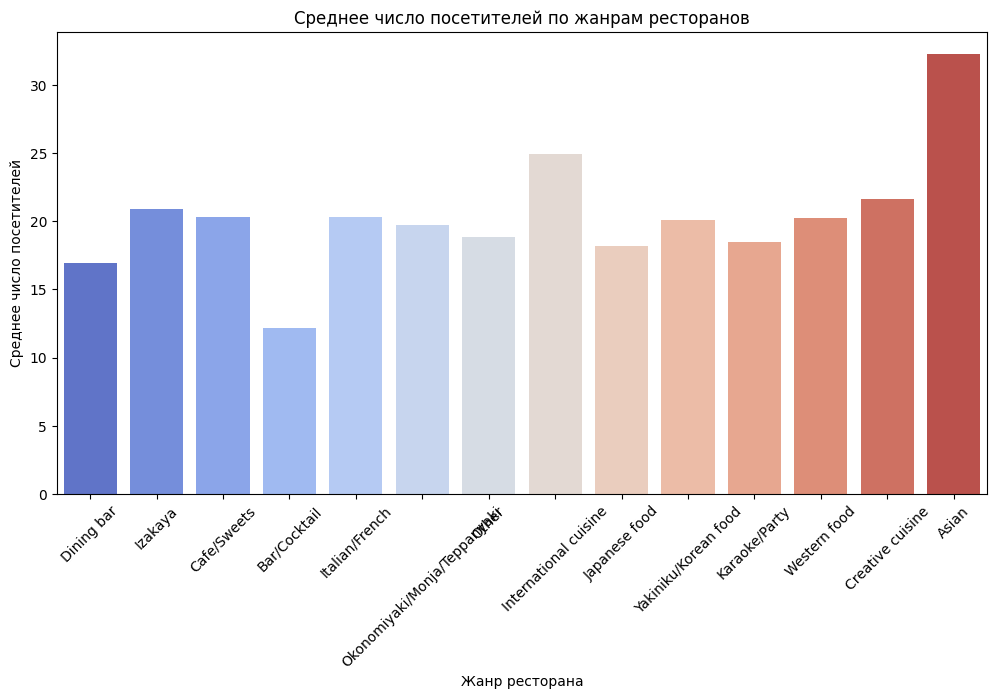

In [15]:
visitors_by_genre = cleaned_air_visit_data.groupby('air_genre_name', sort=False)['visitors'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=visitors_by_genre.index, y=visitors_by_genre.values, palette='coolwarm')

plt.title('Среднее число посетителей по жанрам ресторанов')
plt.xlabel('Жанр ресторана')
plt.ylabel('Среднее число посетителей')
plt.xticks(rotation=45)
plt.show()


<ipython-input-9-4ce453da5cb8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='visitors', data=visitors_by_day.reset_index(), order=days, palette='coolwarm')


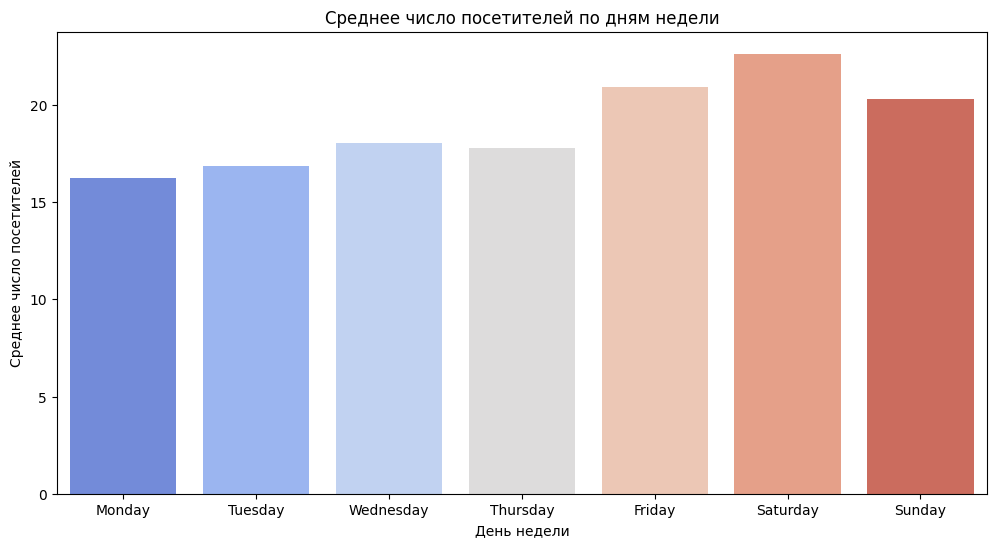

In [9]:
visitors_by_day = cleaned_air_visit_data.groupby('day_of_week', sort=False)['visitors'].mean()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='visitors', data=visitors_by_day.reset_index(), order=days, palette='coolwarm')
plt.title('Среднее число посетителей по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее число посетителей')
plt.show()

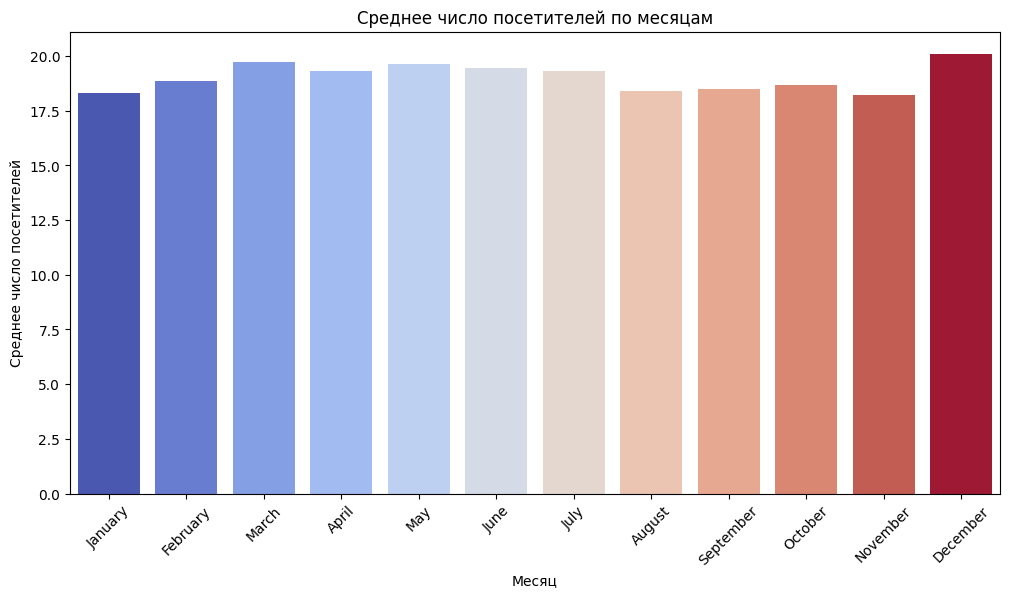

In [10]:
#!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
cleaned_air_visit_data['month'] = cleaned_air_visit_data['visit_date'].dt.month

visitors_by_month = cleaned_air_visit_data.groupby('month', sort=False)['visitors'].mean()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='visitors', data=visitors_by_month.reset_index(), order=range(1, 13), palette='coolwarm', hue='month')
plt.title('Среднее число посетителей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее число посетителей')
plt.xticks(ticks=range(12), labels=months, rotation=45)
plt.legend([], [], frameon=False)
plt.show()

<ipython-input-16-5d5d30c5df22>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visitors_by_holiday.index, y=visitors_by_holiday.values, palette='coolwarm')


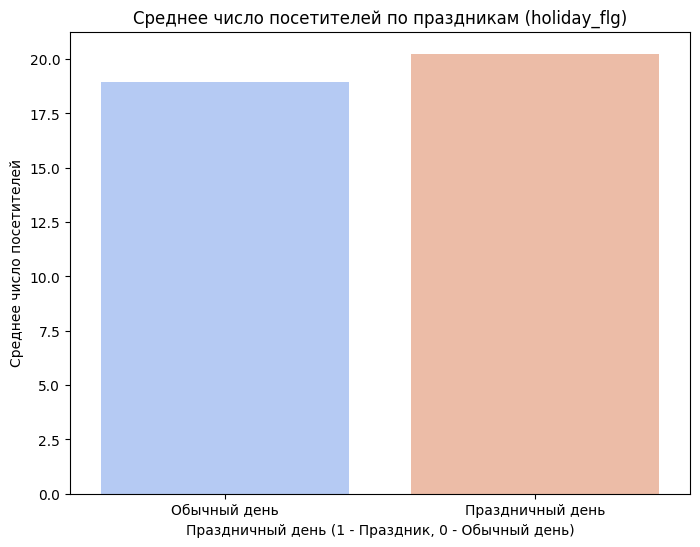

In [16]:
visitors_by_holiday = cleaned_air_visit_data.groupby('holiday_flg', sort=False)['visitors'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=visitors_by_holiday.index, y=visitors_by_holiday.values, palette='coolwarm')
plt.title('Среднее число посетителей по праздникам (holiday_flg)')
plt.xlabel('Праздничный день (1 - Праздник, 0 - Обычный день)')
plt.ylabel('Среднее число посетителей')
plt.xticks([0, 1], ['Обычный день', 'Праздничный день'])
plt.show()


<ipython-input-19-78465e9b71a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visitors_by_area.index, y=visitors_by_area.values, palette='coolwarm')


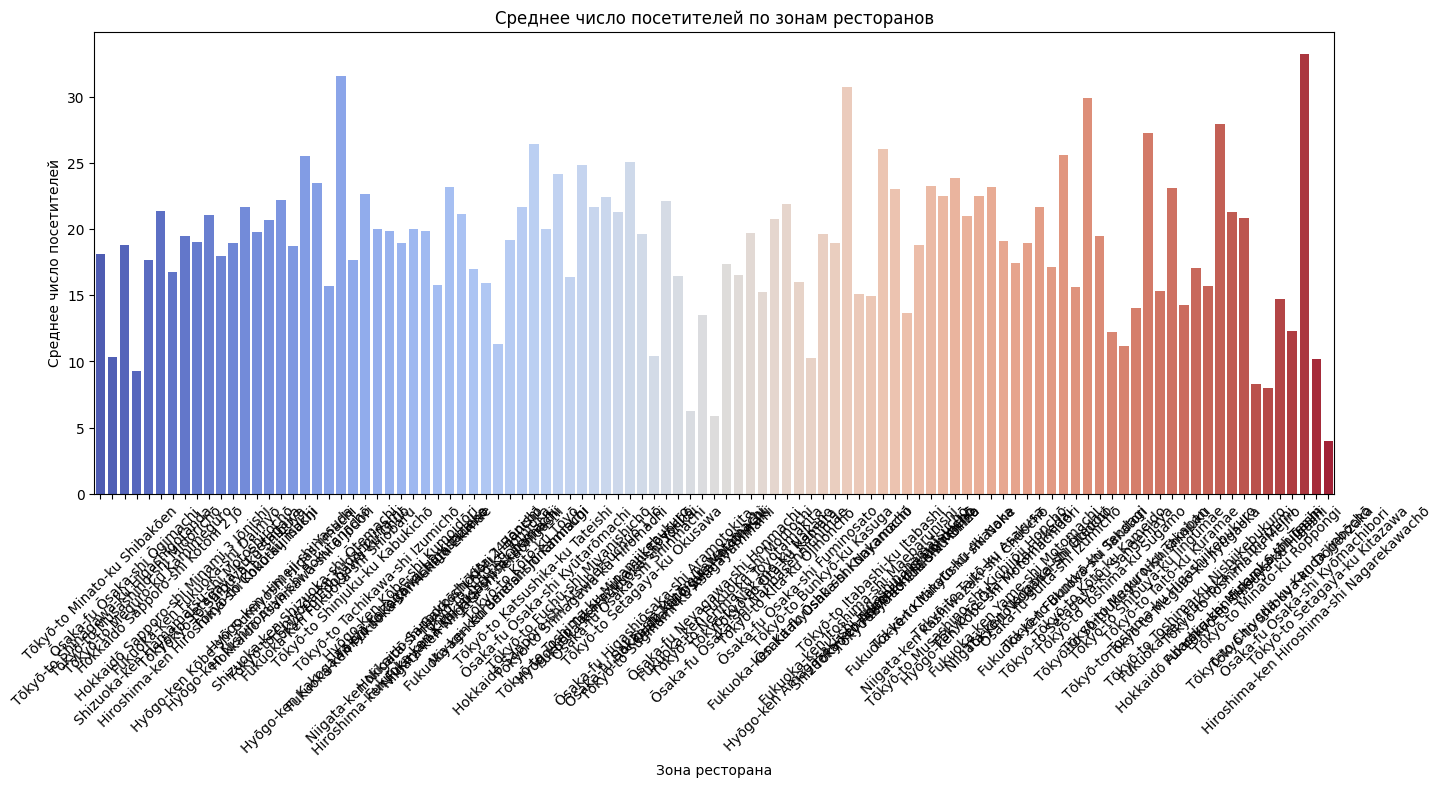

In [19]:
visitors_by_area = cleaned_air_visit_data.groupby('air_area_name', sort=False)['visitors'].mean()

plt.figure(figsize=(16, 6))
sns.barplot(x=visitors_by_area.index, y=visitors_by_area.values, palette='coolwarm')
plt.title('Среднее число посетителей по зонам ресторанов')
plt.xlabel('Зона ресторана')
plt.ylabel('Среднее число посетителей')
plt.xticks(rotation=45)
plt.show()


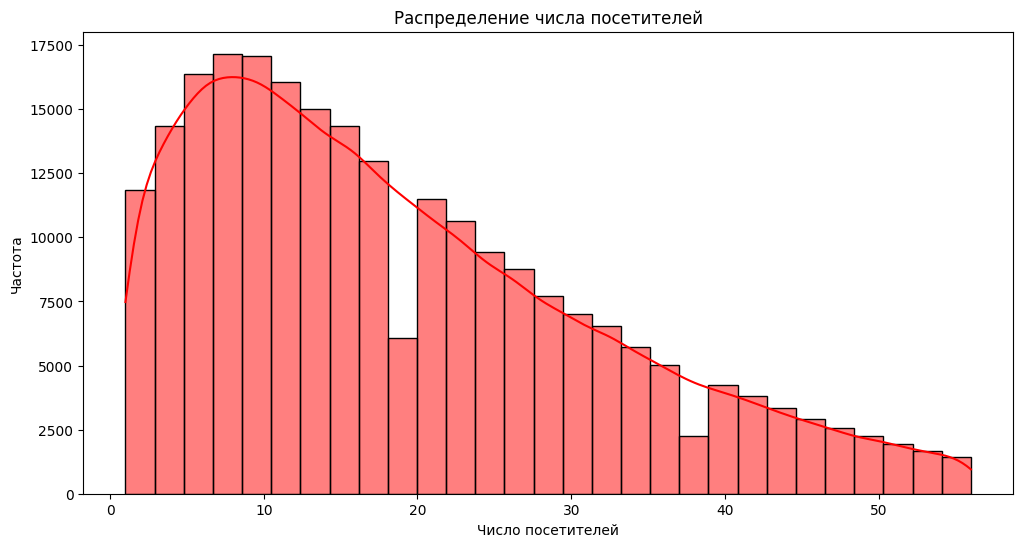

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_air_visit_data['visitors'], bins=29, kde=True, color='red')

plt.title('Распределение числа посетителей')
plt.xlabel('Число посетителей')
plt.ylabel('Частота')
plt.show()

In [11]:
cleaned_air_visit_data.info()
sample_submission.info()
#cleaned_air_visit_data
sample_submission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240023 entries, 0 to 240022
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   air_store_id      240023 non-null  object        
 1   visit_date        240023 non-null  datetime64[ns]
 2   visitors          240023 non-null  int64         
 3   day_of_week       240023 non-null  object        
 4   holiday_flg       240023 non-null  int64         
 5   month             240023 non-null  int32         
 6   air_genre_name    240023 non-null  object        
 7   air_area_name     240023 non-null  object        
 8   latitude          240023 non-null  float64       
 9   longitude         240023 non-null  float64       
 10  reserve_visitors  240023 non-null  float64       
 11  hpg_store_id      240023 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(5)
memory usage: 21.1+ MB
<class 'pandas.core.frame.D

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month,air_genre_name,air_area_name,latitude,longitude,reserve_visitors,hpg_store_id
0,air_00a91d42b08b08d9,2017-04-23,0,Sunday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,hpg_fbe603376b5980fc
1,air_00a91d42b08b08d9,2017-04-24,0,Monday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,hpg_fbe603376b5980fc
2,air_00a91d42b08b08d9,2017-04-25,0,Tuesday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,hpg_fbe603376b5980fc
3,air_00a91d42b08b08d9,2017-04-26,0,Wednesday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,hpg_fbe603376b5980fc
4,air_00a91d42b08b08d9,2017-04-27,0,Thursday,0,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,hpg_fbe603376b5980fc
...,...,...,...,...,...,...,...,...,...,...,...,...
32014,air_fff68b929994bfbd,2017-05-27,0,Saturday,0,5,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,0.0,unknown
32015,air_fff68b929994bfbd,2017-05-28,0,Sunday,0,5,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,0.0,unknown
32016,air_fff68b929994bfbd,2017-05-29,0,Monday,0,5,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,0.0,unknown
32017,air_fff68b929994bfbd,2017-05-30,0,Tuesday,0,5,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,0.0,unknown


In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Обучающая выборка
cleaned_air_visit_data_encoded = cleaned_air_visit_data.copy().reset_index(drop=True)
cleaned_air_visit_data_merge = cleaned_air_visit_data.copy().reset_index(drop=True)

selected_features = cleaned_air_visit_data[['day_of_week', 'holiday_flg', 'month', 'air_genre_name', 'air_area_name', 'hpg_store_id']]

encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(selected_features) #преобраз в 0 1
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(selected_features.columns))

cleaned_air_visit_data_encoded = pd.concat([cleaned_air_visit_data_merge, encoded_df], axis=1)
cleaned_air_visit_data_encoded = cleaned_air_visit_data_encoded.drop(columns=['air_store_id', 'visit_date',
                                                                              'visitors', 'day_of_week',
                                                                              'holiday_flg', 'month',
                                                                              'air_genre_name', 'air_area_name',
                                                                              'hpg_store_id'])

# Тестовая выборка аналогично делаем
sample_submission_encoded = sample_submission.copy()

selected_features_test = sample_submission_encoded[['day_of_week', 'holiday_flg', 'month', 'air_genre_name', 'air_area_name', 'hpg_store_id']]

encoded_features_test = encoder.fit_transform(selected_features_test)
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(selected_features_test.columns))

sample_submission_encoded = pd.concat([sample_submission, encoded_df_test], axis=1)
sample_submission_encoded = sample_submission_encoded.drop(columns=['air_store_id', 'visit_date',
                                                                    'visitors', 'day_of_week',
                                                                    'holiday_flg', 'month',
                                                                    'air_genre_name', 'air_area_name',
                                                                    'hpg_store_id'])

# в тестовой выборке два месяца, в обучающей - 12. Дополним столбцы и заполним нулями
missing_month_columns = [f'month_{i}' for i in range(1, 13) if f'month_{i}' not in sample_submission_encoded.columns]
for col in missing_month_columns:
    sample_submission_encoded[col] = 0.0

# делаем одинаковый порядок столбцов
sample_submission_encoded = sample_submission_encoded[cleaned_air_visit_data_encoded.columns]

cleaned_air_visit_data_encoded.info()
sample_submission_encoded.info()
sample_submission_encoded
#cleaned_air_visit_data_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240023 entries, 0 to 240022
Columns: 285 entries, latitude to hpg_store_id_unknown
dtypes: float64(285)
memory usage: 521.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Columns: 285 entries, latitude to hpg_store_id_unknown
dtypes: float64(285)
memory usage: 69.6 MB


,latitude,longitude,reserve_visitors,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,holiday_flg_1,...,hpg_store_id_hpg_ee8cad9cd96718da,hpg_store_id_hpg_ef517ab154f66a8e,hpg_store_id_hpg_f07ec7b288165b27,hpg_store_id_hpg_f39996d4f0ebcb64,hpg_store_id_hpg_f76ad2d2d0134bdd,hpg_store_id_hpg_f83413cde79ac5e7,hpg_store_id_hpg_fa4eeada9ad7b59f,hpg_store_id_hpg_fbe603376b5980fc,hpg_store_id_hpg_fc892fe8d342a787,hpg_store_id_unknown
0,35.694003,139.753595,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,35.694003,139.753595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,35.694003,139.753595,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35.694003,139.753595,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.694003,139.753595,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32014,35.708146,139.666288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32015,35.708146,139.666288,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32016,35.708146,139.666288,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32017,35.708146,139.666288,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import lightgbm as lgb

# признаки и целевая величина
X_train = cleaned_air_visit_data_encoded
y_train = cleaned_air_visit_data['visitors']

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "LightGBM": lgb.LGBMRegressor(random_state=42)
}

gyper_parameters = {
    "Linear Regression": {},
    "LightGBM": {
        'n_estimators': [100,150,200],
        'learning_rate': [0.1,0.5,1],
        'max_depth': [6,8,10]
    }
}

model_scores = {}
mape_scores = {}

# процесс обучения и подбора гиперпараметров
for name, model in models.items():
    print(f'GridSearchCV для модели: {name}')

    if gyper_parameters[name]:
        grid_search = GridSearchCV(estimator=model, param_grid=gyper_parameters[name], cv=5)
        grid_search.fit(X_train_split, y_train_split)

        print(f"Лучшие гиперпараметры для {name}: {grid_search.best_params_}")

        best_model = grid_search.best_estimator_
        y_val_pred = best_model.predict(X_val_split)
    else:
        # если гиперпараметров нет
        model.fit(X_train_split, y_train_split)
        y_val_pred = model.predict(X_val_split)

    mae = mean_absolute_error(y_val_split, y_val_pred)
    model_scores[name] = mae

    mape = mean_absolute_percentage_error(y_val_split, y_val_pred)
    mape_scores[name] = mape * 100  # в процентах

# сортировка ошибок
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

print("Средние абсолютные ошибки моделей:")
for model, score in sorted_scores:
    print(f"{model}: MAE = {score:.4f}, MAPE = {mape_scores[model]:.2f}%")

# выбор лучшей модели, исходя из ошибки mae
best_model_name = sorted_scores[0][0]
best_model = models[best_model_name]

if best_model_name in gyper_parameters and gyper_parameters[best_model_name]:
    best_model = grid_search.best_estimator_

# Обучаем лучшую модель на всей обучающей выборке
best_model.fit(X_train, y_train)

# прогнозируем визиторс на тестовой выборке
X_test = sample_submission_encoded
y_test_pred = best_model.predict(X_test)

print("Первые 10 прогнозируемых визиторс для тестовой выборки:")
print(y_test_pred[:10])




/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

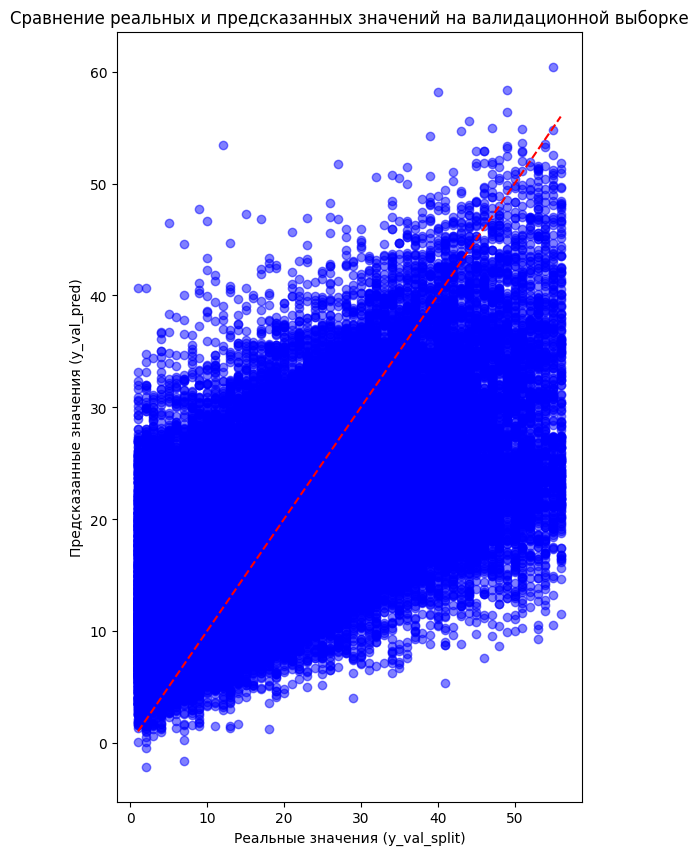

In [76]:
plt.figure(figsize=(6, 8))
plt.scatter(y_val_split, y_val_pred, color='blue', alpha=0.5)
plt.plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], color='red', linestyle='--')
plt.title("Сравнение реальных и предсказанных значений на валидационной выборке")
plt.xlabel("Реальные значения (y_val_split)")
plt.ylabel("Предсказанные значения (y_val_pred)")
plt.show()
